# New York Times Books API

This code

* Uses the New York Times Books API to download that 
  week's Combined Print & E-Book Fiction best seller list. 
* Creates a visualization that shows how many weeks each
  of the books have been on the list.

You need to 
**[sign up](https://developer.nytimes.com/get-started) for a NYT developer 
account**, register a new app, and copy the API key for your app into a
script called `config.py` in the same folder as this notebook. Save the
key as a string with the variable name `api_key`. 

You'll probably also find the 
[NYT API documentation](https://developer.nytimes.com/apis) useful.

In [ ]:
import requests
import pandas as pd

from config import api_key

In [ ]:
# Note that the Combined Print & E-Book Fiction list is published
# just once a week, but the API accepts any date, and returns the
# most recently published list.

date = '2019-01-20'  
list = "combined-print-and-e-book-fiction"

In [ ]:
response = requests.get("https://api.nytimes.com/svc/books/v3/lists//{date}/{list}.json?api-key={api_key}".format(api_key=api_key,date=date,list=list))
data = response.json()
print(data)

{'status': 'OK', 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.', 'num_results': 15, 'last_modified': '2019-08-29T20:54:03-04:00', 'results': {'list_name': 'Combined Print and E-Book Fiction', 'list_name_encoded': 'combined-print-and-e-book-fiction', 'bestsellers_date': '2019-01-05', 'published_date': '2019-01-20', 'published_date_description': '', 'next_published_date': '2019-01-27', 'previous_published_date': '2019-01-13', 'display_name': 'Combined Print & E-Book Fiction', 'normal_list_ends_at': 15, 'updated': 'WEEKLY', 'books': [{'rank': 1, 'rank_last_week': 0, 'weeks_on_list': 1, 'asterisk': 0, 'dagger': 0, 'primary_isbn10': '1538747189', 'primary_isbn13': '9781538747186', 'publisher': 'Grand Central', 'description': 'Agents Pendergast and Coldmoon track a killer who removes hearts and leaves handwritten letters.', 'price': 0, 'title': 'VERSES FOR THE DEAD', 'author': 'Douglas Preston and Lincoln Child', 'contributor': 'by Douglas Preston and Lin

In [ ]:
from pandas.io.json import json_normalize
dataframe = pd.json_normalize(data['results'],record_path=['books'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rank                  15 non-null     int64 
 1   rank_last_week        15 non-null     int64 
 2   weeks_on_list         15 non-null     int64 
 3   asterisk              15 non-null     int64 
 4   dagger                15 non-null     int64 
 5   primary_isbn10        15 non-null     object
 6   primary_isbn13        15 non-null     object
 7   publisher             15 non-null     object
 8   description           15 non-null     object
 9   price                 15 non-null     int64 
 10  title                 15 non-null     object
 11  author                15 non-null     object
 12  contributor           15 non-null     object
 13  contributor_note      15 non-null     object
 14  book_image            15 non-null     object
 15  book_image_width      15 non-null     int6

In [ ]:
df = dataframe[["title", 'author', 'publisher', 'description','rank', 'rank_last_week', 'weeks_on_list']]
df = df.set_index('title')
df

,author,publisher,description,rank,rank_last_week,weeks_on_list
title,,,,,,
VERSES FOR THE DEAD,Douglas Preston and Lincoln Child,Grand Central,Agents Pendergast and Coldmoon track a killer ...,1,0,1
WHERE THE CRAWDADS SING,Delia Owens,Putnam,In a quiet town on the North Carolina coast in...,2,3,17
TARGET: ALEX CROSS,James Patterson,"Little, Brown",Alex Cross returns for the 26th book in the se...,3,8,7
BIRD BOX,Josh Malerman,Ecco,Malorie must get her two young children 20 mil...,4,7,2
A DELICATE TOUCH,Stuart Woods,Putnam,The 48th book in the Stone Barrington series.,5,0,1
THE RECKONING,John Grisham,Doubleday,A decorated World War II veteran shoots and ki...,6,2,11
THE TATTOOIST OF AUSCHWITZ,Heather Morris,Harper,A concentration camp detainee tasked with perm...,7,4,17
CIRCE,Madeline Miller,"Little, Brown","Zeus banishes Helios' daughter to an island, w...",8,0,3
THE BOY,Tami Hoag,Dutton,"Nick Fourcade and Annie Broussard, a husband-a...",9,0,1


In [ ]:
df.describe()

,rank,rank_last_week,weeks_on_list
count,15.000000,15.000000,15.000000
mean,8.000000,5.400000,7.800000
std,4.472136,4.687369,6.537802
min,1.000000,0.000000,1.000000
25%,4.500000,1.000000,2.500000
50%,8.000000,5.000000,7.000000
75%,11.500000,8.500000,11.500000
max,15.000000,14.000000,21.000000


In [ ]:
df.corr()

,rank,rank_last_week,weeks_on_list
rank,1.000000,0.487263,0.070847
rank_last_week,0.487263,1.000000,0.380392
weeks_on_list,0.070847,0.380392,1.000000


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-pastel')
plt.rcParams.update({'font.size': 20, 'figure.figsize': (12, 8)})

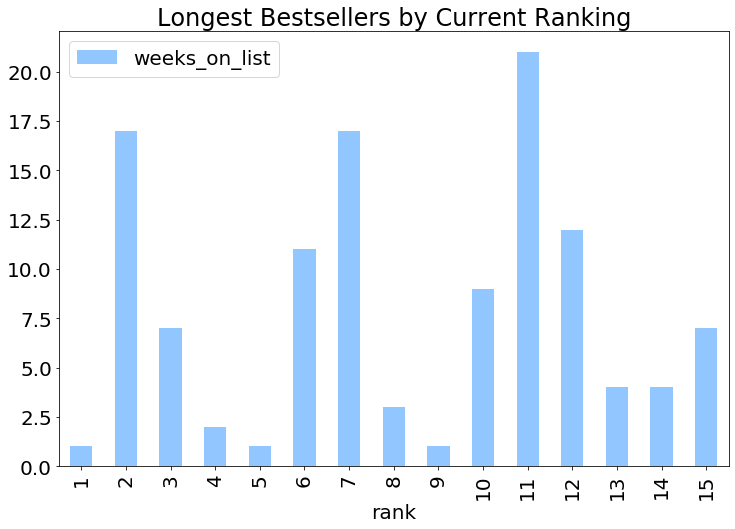

In [ ]:
df.plot(kind='bar', x='rank', y= 'weeks_on_list', title='Longest Bestsellers by Current Ranking')

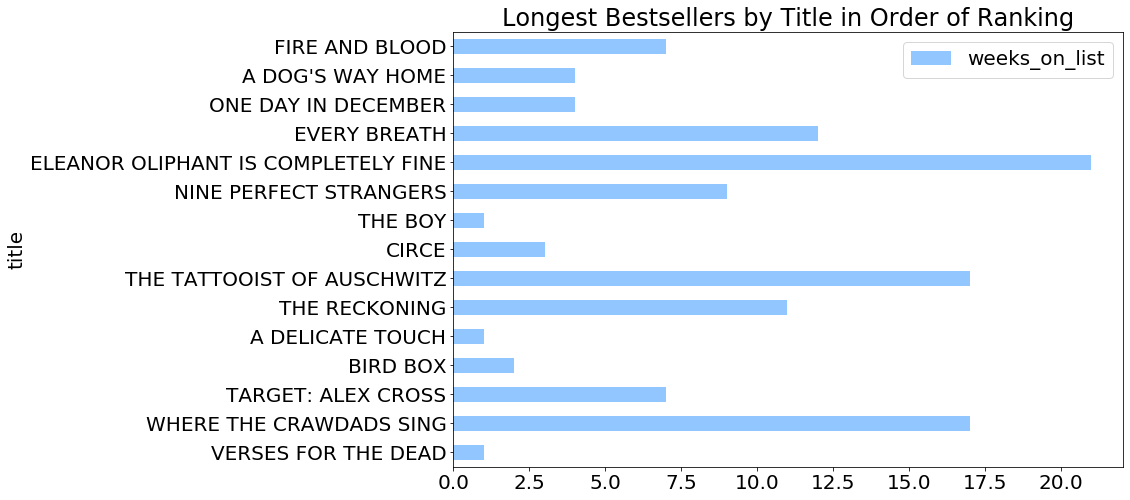

In [ ]:
df.plot(kind='barh', y= 'weeks_on_list', title='Longest Bestsellers by Title in Order of Ranking');

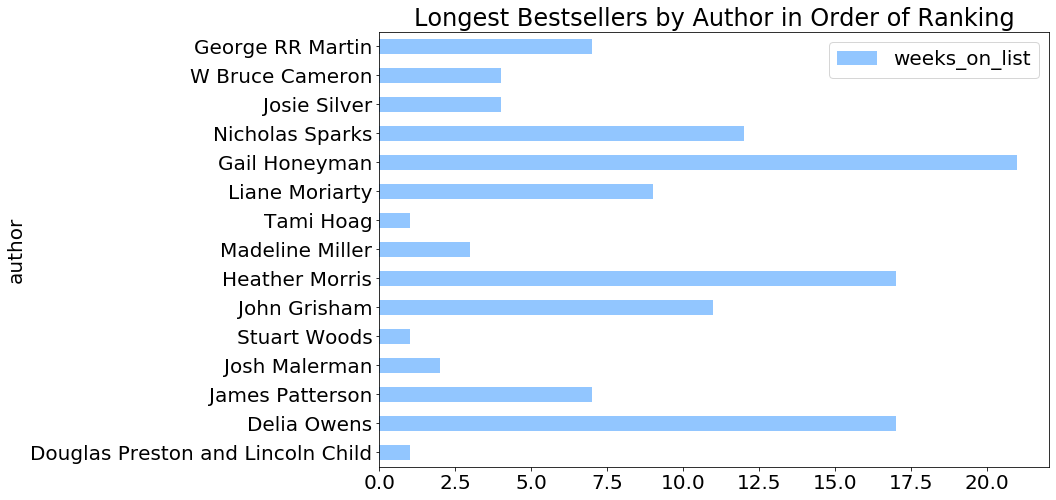

In [ ]:
df.plot(kind='barh', x = 'author', y= 'weeks_on_list', title='Longest Bestsellers by Author in Order of Ranking');

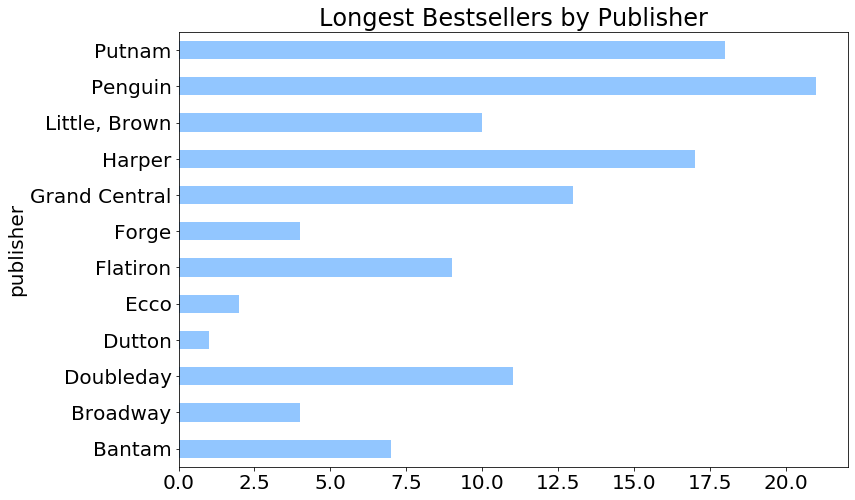

In [ ]:
df.groupby('publisher').weeks_on_list.sum().plot(kind='barh', title='Longest Bestsellers by Publisher')

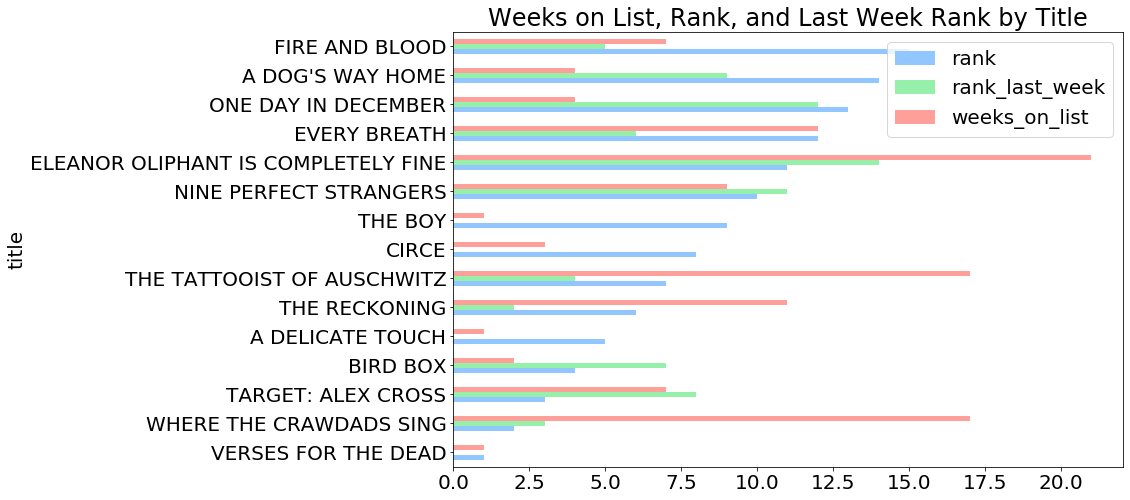

In [ ]:
df.plot(kind='barh', y=["rank","rank_last_week",'weeks_on_list'], title='Weeks on List, Rank, and Last Week Rank by Title')

C:\Users\alwer\Anaconda3\envs\NYTimes API\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


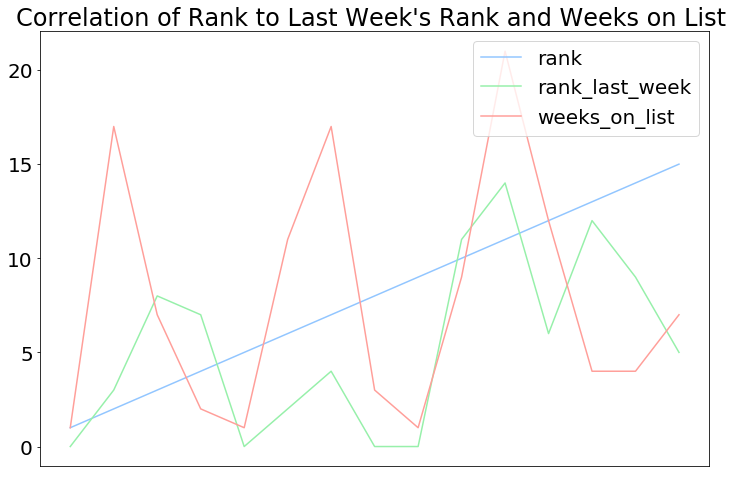

In [ ]:
df.plot(title = "Correlation of Rank to Last Week's Rank and Weeks on List ")
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('weeks_on_list ~ rank + rank_last_week', data=df).fit()
results.summary()

C:\Users\alwer\Anaconda3\envs\NYTimes API\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weeks_on_list   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.159
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.347
Time:                        16:10:33   Log-Likelihood:                -47.606
No. Observations:                  15   AIC:                             101.2
Df Residuals:                      12   BIC:                             103.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.1400      3.556      1.727      0.110      -1.608      13.888
rank              -0.2195      0.442     -0.496      0.629      -1.183       0.744
rank_last_week     0.6326      0.422      1.499      0.160      -0.287       1.552
==============================================================================
Omnibus:                        2.557   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.476
Skew:                           0.501   Prob(JB):                        0.478
Kurtosis:                       1.834   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

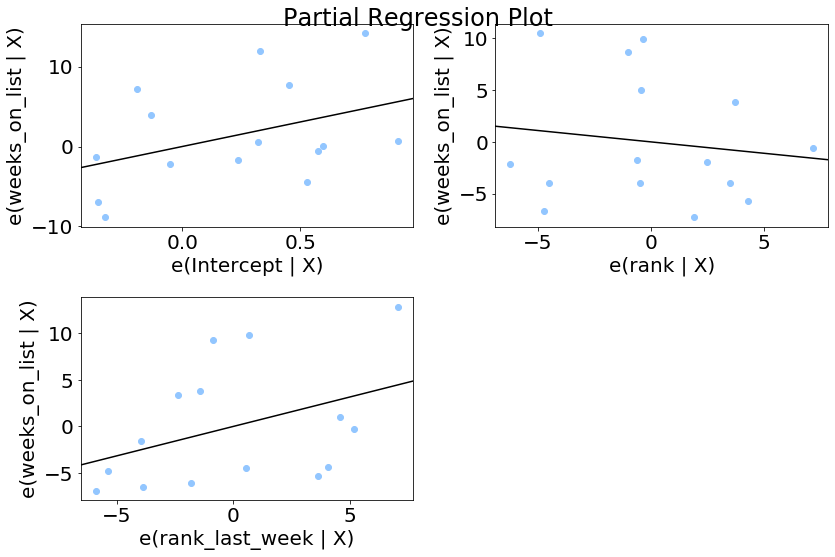

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)